###############################
Quality flag
2.0
###############################
Variáveis disponíveis no arquivo SAR: ['VAVH', 'VPED', 'VTPK', 'time', 'longitude', 'latitude', 'wave_spec', 'partition_domain_spec', 'wavenumber_spec', 'direction_spec', 'nv', 'inten', 'snr', 'resolution_spec', 'VPED_flag', 'VTPK_flag', 'VAVH_flag', 'L2_source_product', 'L2_partition_quality_flag']


/Users/jtakeo/googleDrive/myProjects/sar-spec-partitioning/scripts/utils.py:139: UserWarning: no explicit representation of timezones available for np.datetime64
  idx = abs(times - np.datetime64(date_time)).argmin()


Usando arquivo preprocessado (CMEMS), shape E_sar: (60, 72)
Shape k: (60,)
Shape phi: (72,)
╔══════════════════════════════════════════════════════════════╗
║         CONVERSÃO SAR: m⁴ → m²·s·rad⁻¹ (WW3 units)          ║
╠══════════════════════════════════════════════════════════════╣
║ Shape:                                             (60, 72) ║
║ Frequências: 60 bins | Direções: 72 bins              ║
║ Freq range: 0.0361 - 0.2281 Hz                       ║
║ Dir range: 0.0° - 355.0°                            ║
╟──────────────────────────────────────────────────────────────╢
║ Jacobiano dk/df: 0.2903 - 1.8361                   ║
║ Fator angular (π/180): 0.017453                      ║
╟──────────────────────────────────────────────────────────────╢
║ Parâmetros integrados:                                       ║
║   m0 =   0.095705 m²                                          ║
║   Hs =   1.237450 m                                           ║
╚═══════════════════════════════════════

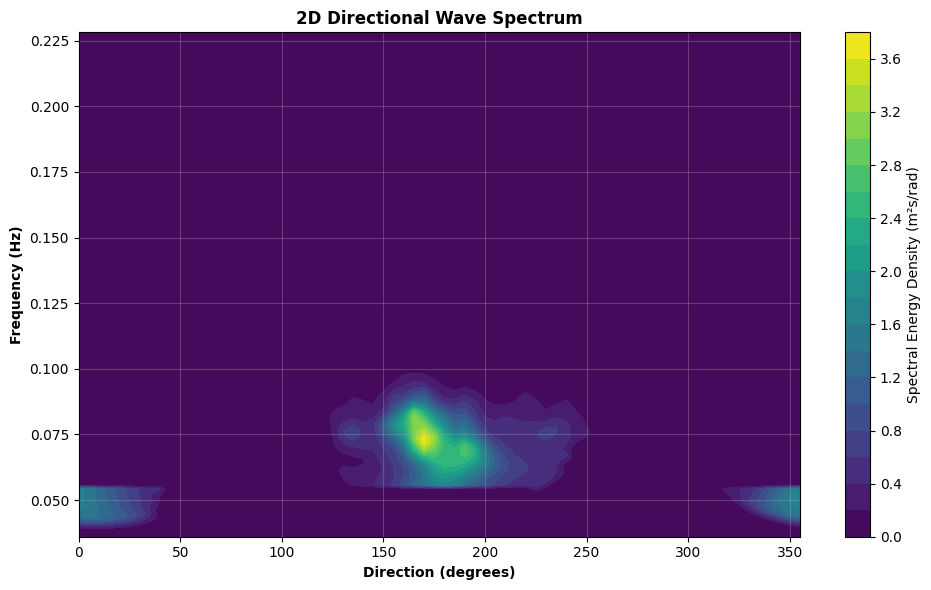

TypeError: partition_spectrum() got an unexpected keyword argument 'source_type'

In [ ]:
import os
import sys
import glob
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from utils import *
from partitionFuncs import *
#file_path = '/Users/jtakeo/googleDrive/myProjects/sar-spec-partitioning/data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
# file_path = '/Users/jtakeo/googleDrive/myProjects/finalPartSpec/surigae/sarspec/sar-data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
# grp = "obs_params"
# ds = xr.open_dataset(file_path, group=grp)
# ds.L2_partition_quality_flag[200:234].values
# ds.VAVH_flag[215:220].values
# ds.VPED_flag[215:220].values
# ds.VTPK_flag[215:220].values
# plt.contour(ds.wave_spec[:,:,217])
# plt.show()

file_path='/Users/jtakeo/googleDrive/myProjects/finalPartSpec/surigae/sarspec/sar-data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'

#file_path = '/Users/jtakeo/googleDrive/myProjects/finalPartSpec/surigae/sarspec/sar-data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
grp = "obs_params"
date_time="2021-04-28T20:00:00Z"
sar_scaling_factor=1.
index = 223
ds = xr.open_dataset(file_path, group=grp)
print('###############################')
print('Quality flag')
print(ds.L2_partition_quality_flag[217].values)
print('###############################')
E2d, freq, dirs, dirs_rad = None, None, None, None
E2d, freq, dirs, dirs_rad, selected_time = load_sar_spectrum(
ds, date_time, index)

hs, tp, dp, m0, delf, ddir, _, _ = calculate_wave_parameters(
        E2d, freq, dirs_rad
    )
print('###############################')
print('Wave parameters')
print(f'total parameters hs, tp and dp:  {hs}, {tp}, {dp}')
print('###############################')

# NF, ND = E2d.shape
# ICOD, MASK, peaks, nmask = identify_spectral_peaks(
#         E2d, NF, ND, 0.05, 5, 'sar')

# plt.contourf(MASK)
# plt.show()
# distances = calculate_peak_distances(peaks, freq, dirs_rad, nmask)
# hs, tp, dp, m0, delf, ddir, _, _ = calculate_wave_parameters(E2d, freq, dirs_rad)
# Eip = calculate_peak_spreading(E2d, MASK, freq, dirs_rad, NF, ND, nmask, m0, delf, ddir)
# MASK = merge_overlapping_systems(MASK, distances, Eip, peaks, nmask)


# Plot 2D directional spectrum
plt.figure(figsize=(10, 6))
plt.contourf(dirs, freq, E2d, levels=20, cmap='viridis')
plt.colorbar(label='Spectral Energy Density (m²s/rad)')
plt.xlabel('Direction (degrees)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('2D Directional Wave Spectrum', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


partition_results = partition_spectrum(
            E2d, freq, dirs_rad, 0.05, 5)

partition_results



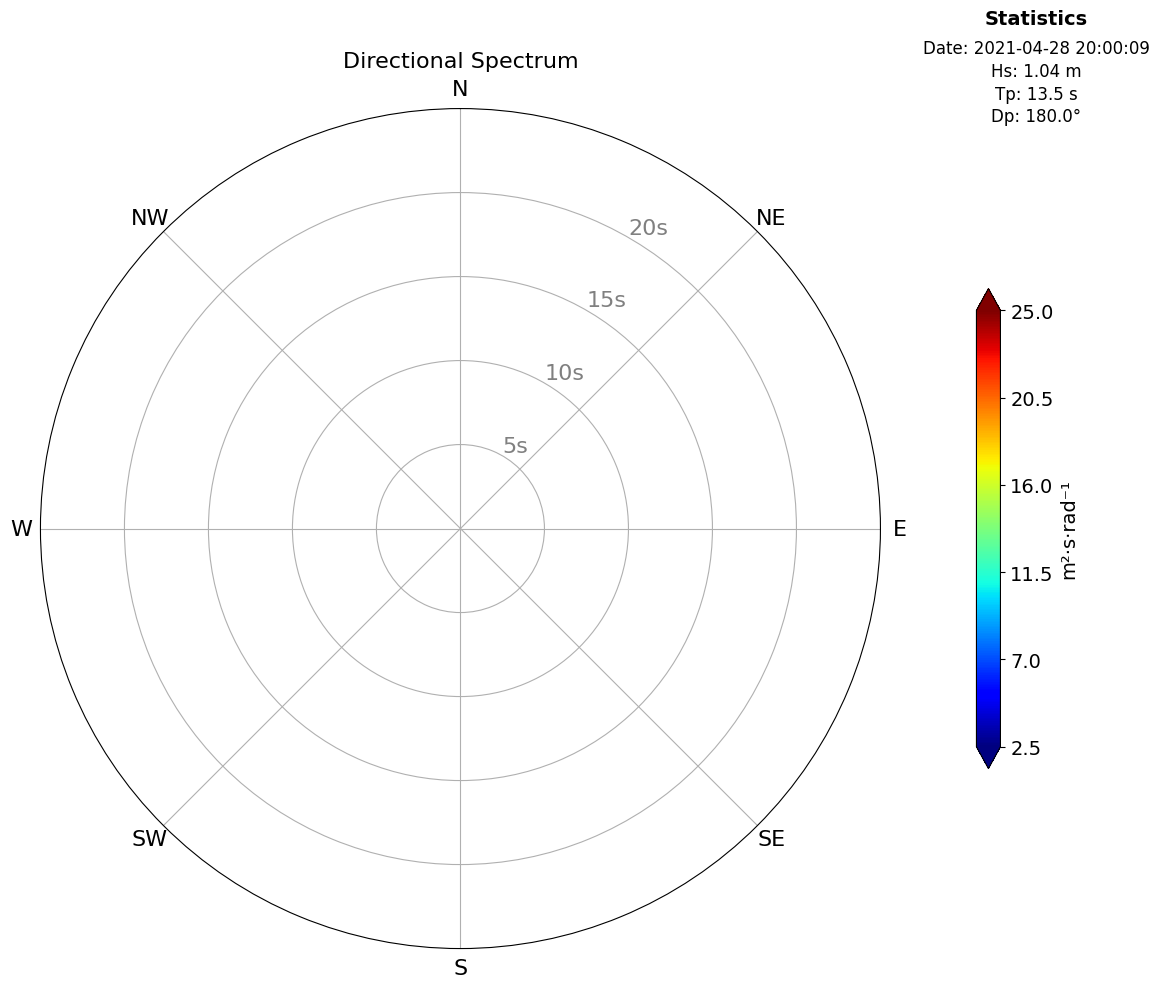

In [2]:
# Plot 2D polar do espectro direcional - exatamente como directional_plot.py
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

Eplot = np.nan_to_num(E2d, nan=0.0, neginf=0.0, posinf=0.0)

# Ensure 1D arrays
freq_plot = np.asarray(freq).flatten()
dirs_plot = np.asarray(dirs).flatten()

# Convert directions to radians & sort
dirs_rad_plot = np.radians(dirs_plot)
sort_idx = np.argsort(dirs_rad_plot)
dirs_sorted = dirs_rad_plot[sort_idx]
Eplot_sorted = Eplot[:, sort_idx]

# Guarantee periodic wrap (append 2pi)
if not np.isclose(dirs_sorted[0], 0.0):
    dirs_sorted = np.insert(dirs_sorted, 0, 0.0)
    Eplot_sorted = np.insert(Eplot_sorted, 0, Eplot_sorted[:, 0], axis=1)
if not np.isclose(dirs_sorted[-1], 2*np.pi):
    dirs_sorted = np.append(dirs_sorted, 2*np.pi)
    Eplot_sorted = np.concatenate([Eplot_sorted, Eplot_sorted[:, 0:1]], axis=1)

# Radial = period (s)
with np.errstate(divide='ignore', invalid='ignore'):
    period = np.where(freq_plot > 0, 1.0 / freq_plot, 0)

theta, r = np.meshgrid(dirs_sorted, period)

# Default color scales
vmin = 2.5
vmax = 25
step = max((vmax - vmin)/50.0, 0.5)
levels = np.arange(vmin + step, vmax + step*0.51, step)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='polar')

cs = ax.contour(theta, r, Eplot_sorted, levels, cmap='jet', vmin=vmin, vmax=vmax)

# Axes style
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([5, 10, 15, 20])
ax.set_yticklabels(['5s', '10s', '15s', '20s'], color='gray', fontsize=7.5)
ax.set_rlim(0, 25)
ax.set_rlabel_position(30)
ax.tick_params(axis='y', colors='gray', labelsize=16)
ticks = ['N','NE','E','SE','S','SW','W','NW']
tick_angles = np.deg2rad(np.linspace(0, 315, 8))
ax.set_xticks(tick_angles)
ax.set_xticklabels(ticks)
ax.tick_params(axis='x', colors='k', labelsize=16)
title = 'Directional Spectrum'
ax.set_title(title, fontsize=16, color='k', pad=30)

# Stats box
stats_ax = fig.add_axes([0.75, 0.7, 0.2, 0.15], facecolor='white')
stats_ax.patch.set_alpha(0.8)
stats_ax.patch.set_edgecolor('black')
stats_ax.patch.set_linewidth(1.5)
stats_ax.axis('off')

stats_ax.text(0.7, 1.9, 'Statistics', fontsize=14, color='k', ha='center', va='center', weight='bold')
date_str = selected_time.strftime('%Y-%m-%d %H:%M:%S')
stats_ax.text(0.7, 1.7, f'Date: {date_str}', fontsize=12, color='k', ha='center', va='center')
y_offset = 1.55
stats_ax.text(0.7, y_offset, f'Hs: {hs:.2f} m', fontsize=12, color='k', ha='center', va='center')
stats_ax.text(0.7, y_offset-0.15, f'Tp: {tp:.1f} s', fontsize=12, color='k', ha='center', va='center')
stats_ax.text(0.7, y_offset-0.3, f'Dp: {dp:.1f}°', fontsize=12, color='k', ha='center', va='center')

colorbar_label = 'm²·s·rad⁻¹'

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, fraction=0.025, pad=0.1, ax=ax, extend='both')
cbar.set_label(colorbar_label, fontsize=14)
cbar.ax.tick_params(labelsize=14)
tick_interval = (vmax - vmin) / 5
cbar.set_ticks(np.arange(vmin, vmax + 0.5 * tick_interval, tick_interval))

# Ajuste manual ao invés de tight_layout
fig.subplots_adjust(left=0.06, right=0.86, top=0.9, bottom=0.05)

plt.show()


## Análise de Distribuição de Energia

Vamos calcular:
1. **Energia Total** do espectro original
2. **Energia de cada sistema** particionado
3. **Energia eliminada** (não atribuída a nenhum sistema)
4. **Porcentagens** de cada componente


In [64]:
# Calcular energia total do espectro original
energia_total = partition_results['total_m0']
print(f"{'='*60}")
print(f"ANÁLISE DE ENERGIA - DISTRIBUIÇÃO DO ESPECTRO")
print(f"{'='*60}\n")

print(f"📊 ENERGIA TOTAL DO ESPECTRO ORIGINAL:")
print(f"   m0 = {energia_total:.6f} m²")
print(f"   Hs total = {partition_results['total_Hs']:.3f} m")
print(f"   (Hs = 4√m0 = 4√{energia_total:.6f} = {4*np.sqrt(energia_total):.3f} m)")
print(f"\n{'─'*60}\n")

# Obter energias das partições
nmask = partition_results['nmask']
energias_particoes = partition_results['energy']

print(f"🌊 SISTEMAS DE ONDAS IDENTIFICADOS: {nmask} partições\n")

# Calcular soma das energias das partições (índices 1 até nmask)
energia_distribuida = np.sum(energias_particoes[1:nmask+1])

# Energia não classificada (índice 0) e além do nmask
energia_nao_classificada = energias_particoes[0]
energia_residual = np.sum(energias_particoes[nmask+1:]) if len(energias_particoes) > nmask+1 else 0.0

# Energia eliminada/perdida
energia_eliminada = energia_total - energia_distribuida - energia_nao_classificada - energia_residual

print(f"Partição     Energia (m²)    Hs (m)    Tp (s)    Dp (°)    % do Total")
print(f"{'─'*75}")

for i in range(1, nmask+1):
    e_part = energias_particoes[i]
    hs_part = partition_results['Hs'][i]
    tp_part = partition_results['Tp'][i]
    dp_part = partition_results['Dp'][i]
    percentual = (e_part / energia_total) * 100
    print(f"  P{i:02d}       {e_part:10.6f}      {hs_part:5.2f}    {tp_part:6.1f}    {dp_part:6.1f}°    {percentual:6.2f}%")

print(f"{'─'*75}")
print(f"TOTAL        {energia_distribuida:10.6f}                                   {(energia_distribuida/energia_total)*100:6.2f}%")

if energia_nao_classificada > 1e-10:
    print(f"\n⚠️  Não classificada: {energia_nao_classificada:.6f} m² ({(energia_nao_classificada/energia_total)*100:.2f}%)")

if abs(energia_eliminada) > 1e-10:
    print(f"❌ Eliminada/Perdida: {energia_eliminada:.6f} m² ({(energia_eliminada/energia_total)*100:.2f}%)")

print(f"\n{'─'*60}\n")

# Verificação de conservação de energia
diferenca = abs(energia_total - energia_distribuida - energia_nao_classificada - energia_residual)
if diferenca < 1e-6:
    print(f"✅ CONSERVAÇÃO DE ENERGIA: OK (diferença < 10⁻⁶)")
else:
    print(f"⚠️  CONSERVAÇÃO DE ENERGIA: Diferença = {diferenca:.6e} m²")

print(f"\n{'='*60}")


ANÁLISE DE ENERGIA - DISTRIBUIÇÃO DO ESPECTRO

📊 ENERGIA TOTAL DO ESPECTRO ORIGINAL:
   m0 = 0.031515 m²
   Hs total = 0.710 m
   (Hs = 4√m0 = 4√0.031515 = 0.710 m)

────────────────────────────────────────────────────────────

🌊 SISTEMAS DE ONDAS IDENTIFICADOS: 3 partições

Partição     Energia (m²)    Hs (m)    Tp (s)    Dp (°)    % do Total
───────────────────────────────────────────────────────────────────────────
  P01         0.022363       0.60      13.1      49.8°     70.96%
  P02         0.005312       0.29      14.8     242.6°     16.86%
  P03         0.003840       0.25      14.8      64.0°     12.18%
───────────────────────────────────────────────────────────────────────────
TOTAL          0.031515                                   100.00%
❌ Eliminada/Perdida: 0.000000 m² (0.00%)

────────────────────────────────────────────────────────────

✅ CONSERVAÇÃO DE ENERGIA: OK (diferença < 10⁻⁶)



### Visualização da Distribuição de Energia

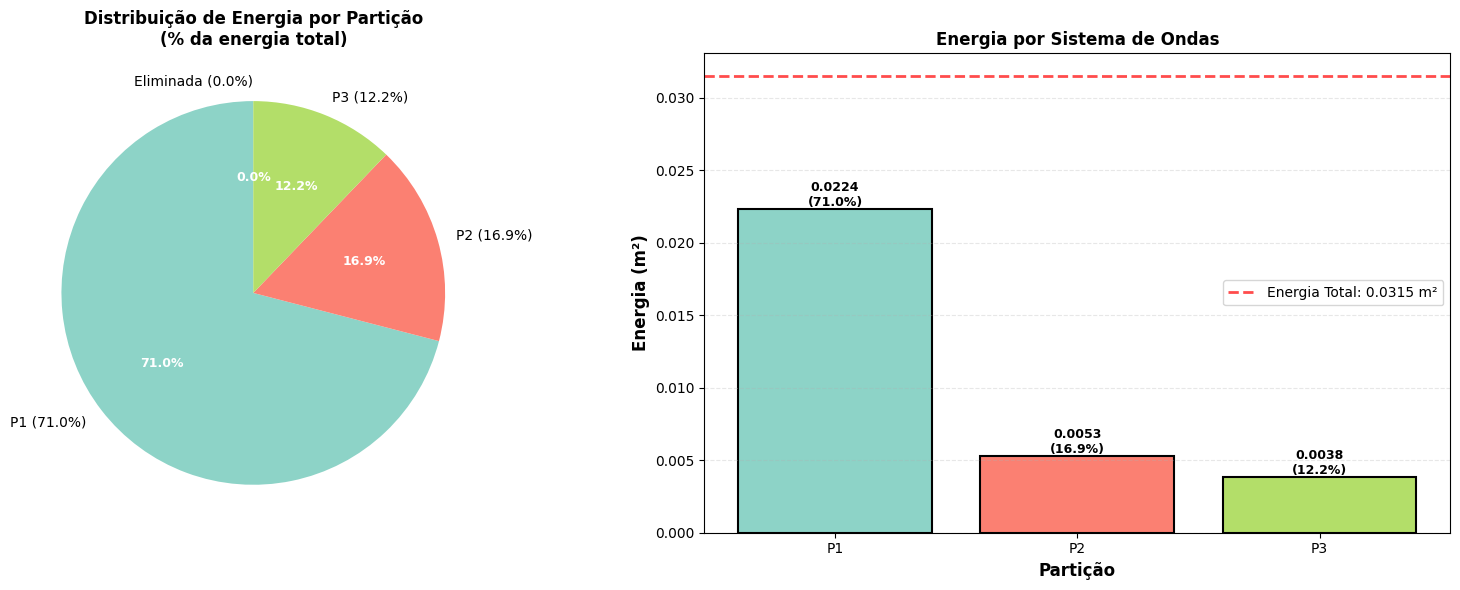


📈 Gráficos gerados com sucesso!


In [54]:
# Criar gráfico de pizza mostrando distribuição de energia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Preparar dados para o gráfico
labels = []
sizes = []
colors = plt.cm.Set3(np.linspace(0, 1, nmask + 2))

for i in range(1, nmask+1):
    e_part = energias_particoes[i]
    percentual = (e_part / energia_total) * 100
    labels.append(f'P{i} ({percentual:.1f}%)')
    sizes.append(e_part)

# Adicionar energia não classificada se existir
if energia_nao_classificada > 1e-10:
    percentual_nc = (energia_nao_classificada / energia_total) * 100
    labels.append(f'Não classificada ({percentual_nc:.1f}%)')
    sizes.append(energia_nao_classificada)

# Adicionar energia eliminada se existir
if abs(energia_eliminada) > 1e-10:
    percentual_elim = (abs(energia_eliminada) / energia_total) * 100
    labels.append(f'Eliminada ({percentual_elim:.1f}%)')
    sizes.append(abs(energia_eliminada))

# Gráfico de pizza
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
                                     colors=colors[:len(sizes)], startangle=90,
                                     textprops={'fontsize': 10})
ax1.set_title('Distribuição de Energia por Partição\n(% da energia total)', 
              fontsize=12, fontweight='bold')

# Melhorar legibilidade dos textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Gráfico de barras
bar_labels = [f'P{i}' for i in range(1, nmask+1)]
bar_energias = [energias_particoes[i] for i in range(1, nmask+1)]
bar_colors = colors[:nmask]

bars = ax2.bar(bar_labels, bar_energias, color=bar_colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Energia (m²)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Partição', fontsize=12, fontweight='bold')
ax2.set_title('Energia por Sistema de Ondas', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores no topo das barras
for bar, energia in zip(bars, bar_energias):
    height = bar.get_height()
    percentual = (energia / energia_total) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{energia:.4f}\n({percentual:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Adicionar linha de referência da energia total
ax2.axhline(y=energia_total, color='red', linestyle='--', linewidth=2, 
            label=f'Energia Total: {energia_total:.4f} m²', alpha=0.7)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n📈 Gráficos gerados com sucesso!")


### Análise Detalhada: Balanço de Energia

In [51]:
# Debug: verificar dimensões das variáveis
print(f"Shape de E2d: {E2d.shape}")
print(f"Shape de mask: {partition_results['mask'].shape}")
print(f"Shape de delf: {delf.shape}")
print(f"Shape de ddir: {ddir}")
print(f"Número de frequências (NF): {len(freq)}")
print(f"Número de direções (ND): {len(dirs)}")


Shape de E2d: (60, 72)
Shape de mask: (60, 72)
Shape de delf: (60,)
Shape de ddir: 0.08726646259971647
Número de frequências (NF): 60
Número de direções (ND): 72


In [52]:
# Verificar energia em cada ponto do espectro e como foi classificada
mask = partition_results['mask']

# Calcular energia bruta do espectro (ddir é escalar, delf é vetor)
# Energia = Σ E(f,θ) * Δf * Δθ
energia_bruta_espectro = 0.0
for i in range(E2d.shape[0]):  # frequências
    for j in range(E2d.shape[1]):  # direções
        energia_bruta_espectro += E2d[i, j] * delf[i] * ddir

print(f"{'='*70}")
print(f"BALANÇO DETALHADO DE ENERGIA")
print(f"{'='*70}\n")

print(f"1️⃣  ENERGIA DO ESPECTRO ORIGINAL:")
print(f"    Calculada via m0: {energia_total:.8f} m²")
print(f"    Calculada diretamente: {energia_bruta_espectro:.8f} m²")
print(f"    Diferença: {abs(energia_total - energia_bruta_espectro):.2e} m²\n")

print(f"2️⃣  ENERGIA APÓS PARTICIONAMENTO:")
print(f"    Total distribuído: {energia_distribuida:.8f} m² ({(energia_distribuida/energia_total)*100:.3f}%)")

# Verificar conservação por partição
print(f"\n    Detalhamento por partição:")
for idx in range(1, nmask+1):
    # Calcular energia bruta da partição
    energia_bruta_part = 0.0
    for i in range(E2d.shape[0]):
        for j in range(E2d.shape[1]):
            if mask[i, j] == idx:
                energia_bruta_part += E2d[i, j] * delf[i] * ddir
    
    energia_via_results = energias_particoes[idx]
    diff = abs(energia_bruta_part - energia_via_results)
    
    print(f"      P{idx}: {energia_via_results:.8f} m² (bruta: {energia_bruta_part:.8f}, diff: {diff:.2e})")

# Verificar pontos não classificados
energia_mask0 = 0.0
num_pontos_0 = 0
for i in range(E2d.shape[0]):
    for j in range(E2d.shape[1]):
        if mask[i, j] == 0:
            energia_mask0 += E2d[i, j] * delf[i] * ddir
            num_pontos_0 += 1

if num_pontos_0 > 0:
    print(f"\n    ⚠️  Pontos não classificados (mask=0):")
    print(f"       Número de pontos: {num_pontos_0}")
    print(f"       Energia: {energia_mask0:.8f} m² ({(energia_mask0/energia_total)*100:.3f}%)")

# Verificar se há pontos com mask > nmask
energia_residual_calc = 0.0
num_pontos_residual = 0
for i in range(E2d.shape[0]):
    for j in range(E2d.shape[1]):
        if mask[i, j] > nmask:
            energia_residual_calc += E2d[i, j] * delf[i] * ddir
            num_pontos_residual += 1

if num_pontos_residual > 0:
    print(f"\n    ⚠️  Pontos residuais (mask>{nmask}):")
    print(f"       Número de pontos: {num_pontos_residual}")
    print(f"       Energia: {energia_residual_calc:.8f} m² ({(energia_residual_calc/energia_total)*100:.3f}%)")

print(f"\n3️⃣  RESUMO DO BALANÇO:")
energia_contabilizada = energia_distribuida + energia_nao_classificada + energia_residual
energia_perdida = energia_total - energia_contabilizada

print(f"    ✅ Energia distribuída nos sistemas: {energia_distribuida:.6f} m² ({(energia_distribuida/energia_total)*100:.2f}%)")
if energia_nao_classificada > 1e-10:
    print(f"    ⚠️  Energia não classificada: {energia_nao_classificada:.6f} m² ({(energia_nao_classificada/energia_total)*100:.2f}%)")
if abs(energia_perdida) > 1e-6:
    print(f"    ❌ Energia perdida/discrepância: {energia_perdida:.6f} m² ({(energia_perdida/energia_total)*100:.2f}%)")
else:
    print(f"    ✅ Sem perda de energia (conservação perfeita)")

print(f"\n    TOTAL CONTABILIZADO: {energia_contabilizada:.6f} m² ({(energia_contabilizada/energia_total)*100:.2f}%)")

print(f"\n{'='*70}")


BALANÇO DETALHADO DE ENERGIA

1️⃣  ENERGIA DO ESPECTRO ORIGINAL:
    Calculada via m0: 0.03151471 m²
    Calculada diretamente: 0.03151473 m²
    Diferença: 2.24e-08 m²

2️⃣  ENERGIA APÓS PARTICIONAMENTO:
    Total distribuído: 0.03151471 m² (100.000%)

    Detalhamento por partição:
      P1: 0.02236282 m² (bruta: 0.02236283, diff: 9.20e-09)
      P2: 0.00531230 m² (bruta: 0.00531230, diff: 6.18e-10)
      P3: 0.00383958 m² (bruta: 0.00383958, diff: 7.26e-10)

3️⃣  RESUMO DO BALANÇO:
    ✅ Energia distribuída nos sistemas: 0.031515 m² (100.00%)
    ✅ Sem perda de energia (conservação perfeita)

    TOTAL CONTABILIZADO: 0.031515 m² (100.00%)

